<a href="https://colab.research.google.com/github/Saaicharan/Colordetect/blob/main/Colordetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving 0_9H74uSINU-qGHWz5.jpg to 0_9H74uSINU-qGHWz5.jpg


CSV saved at /content/colour_detection_output.csv


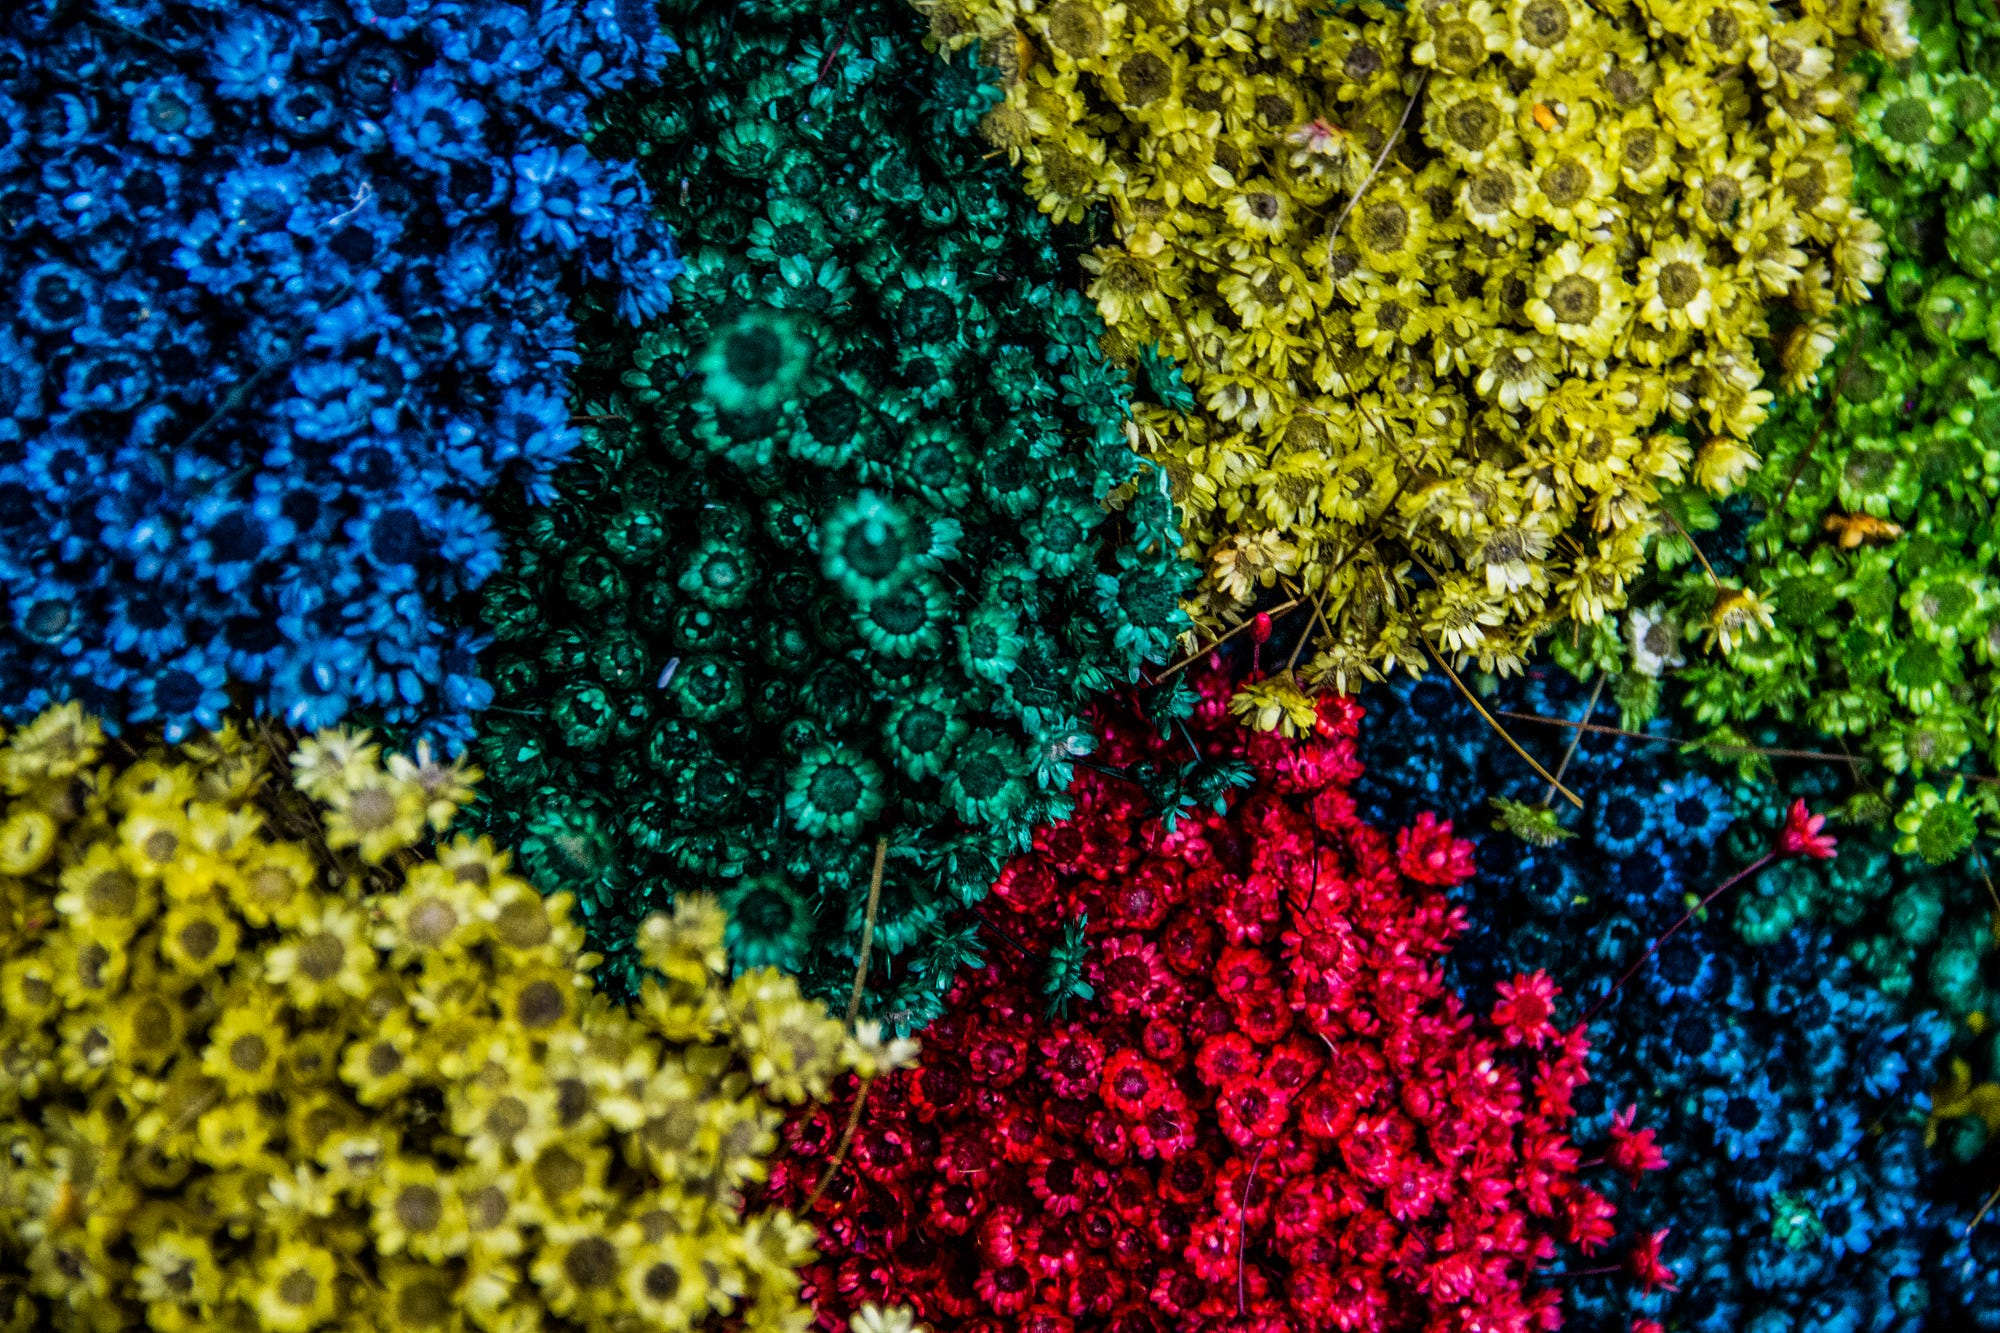

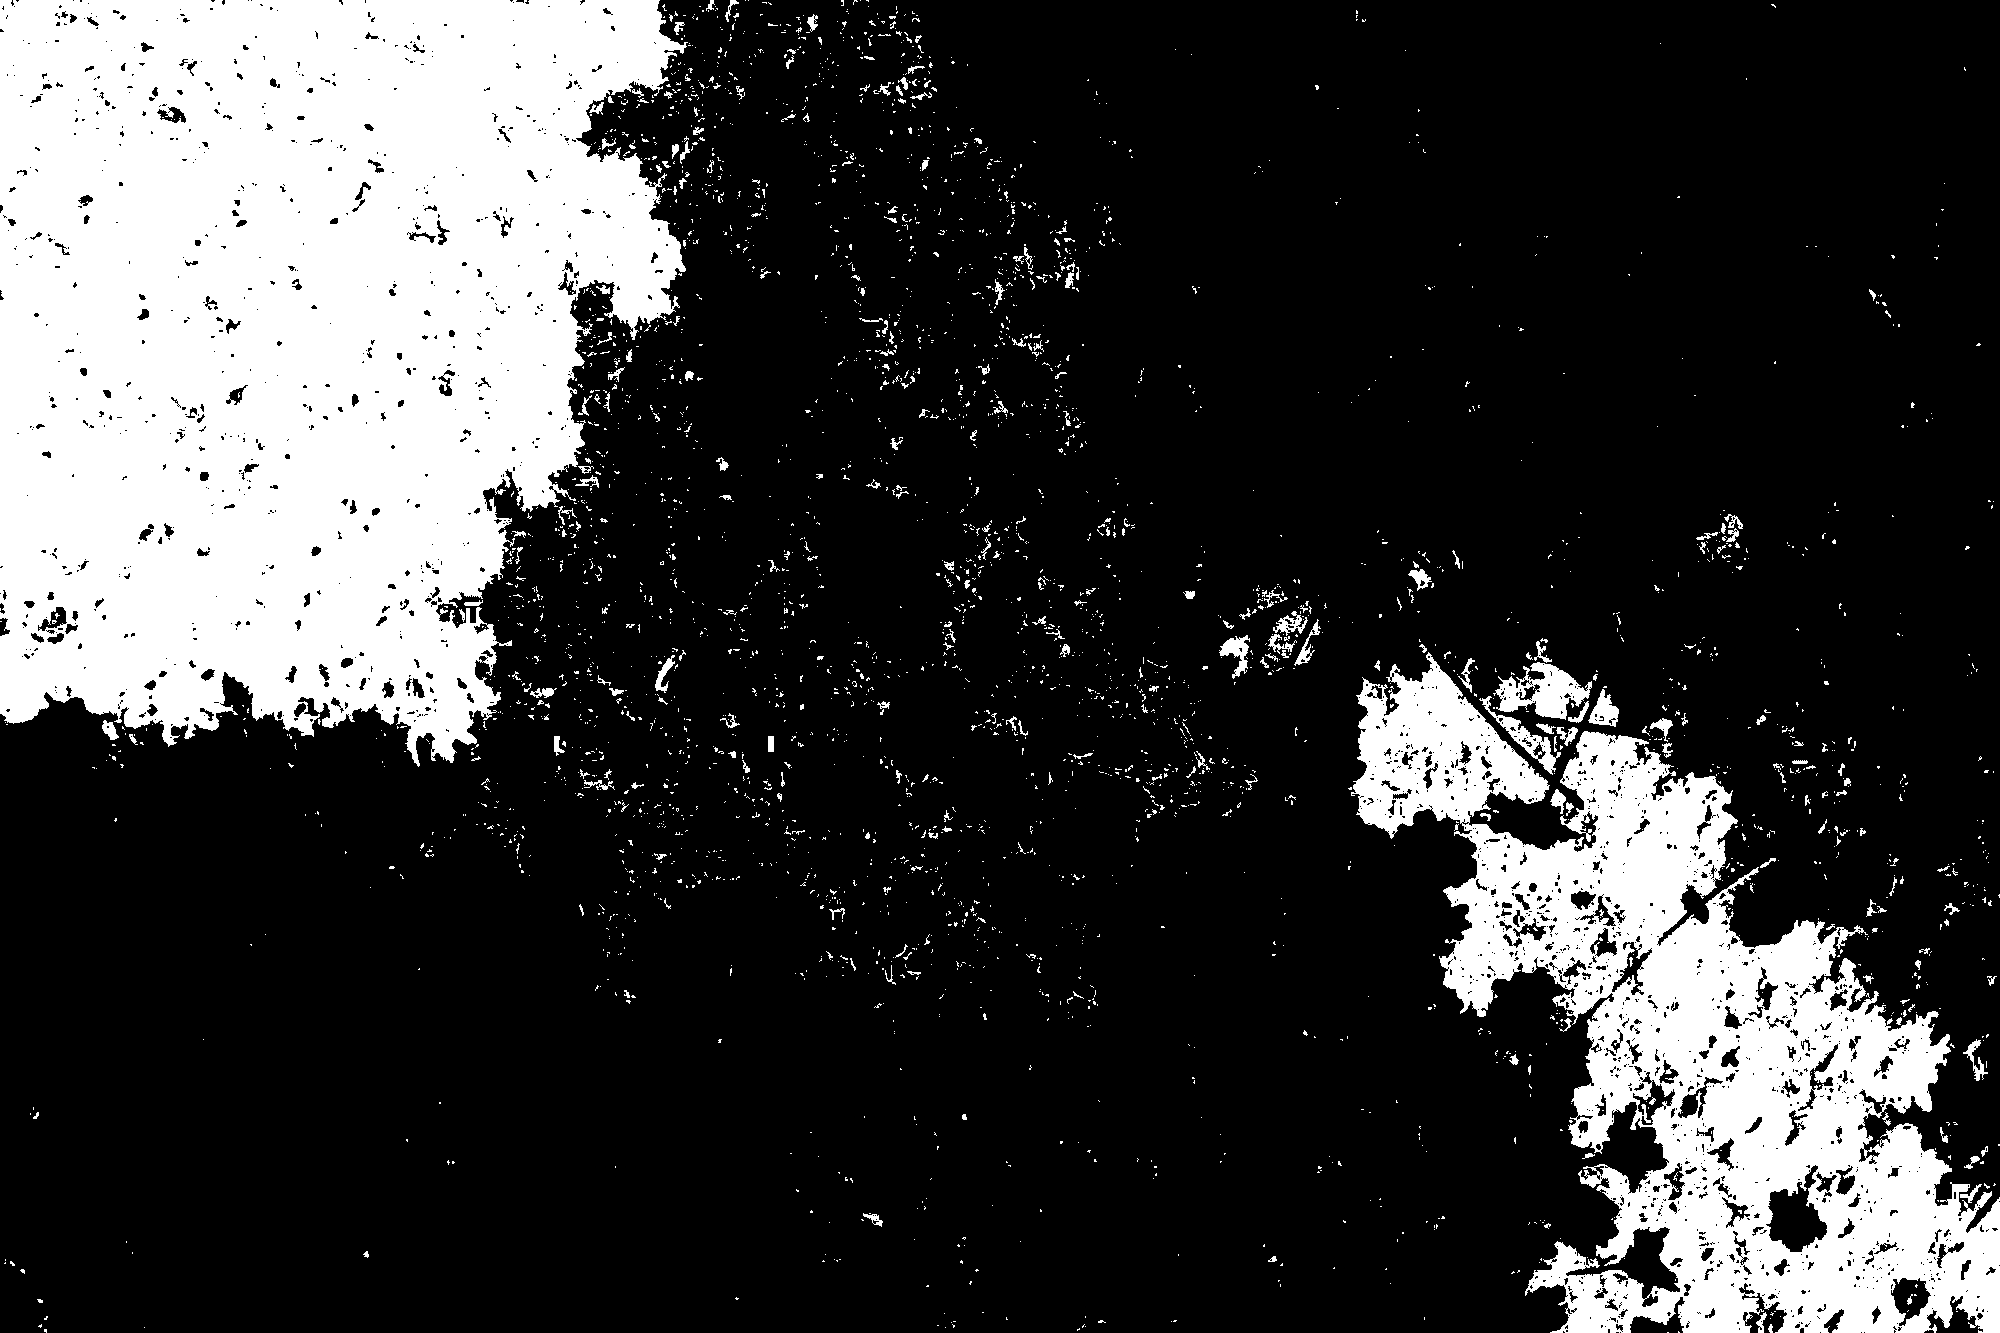

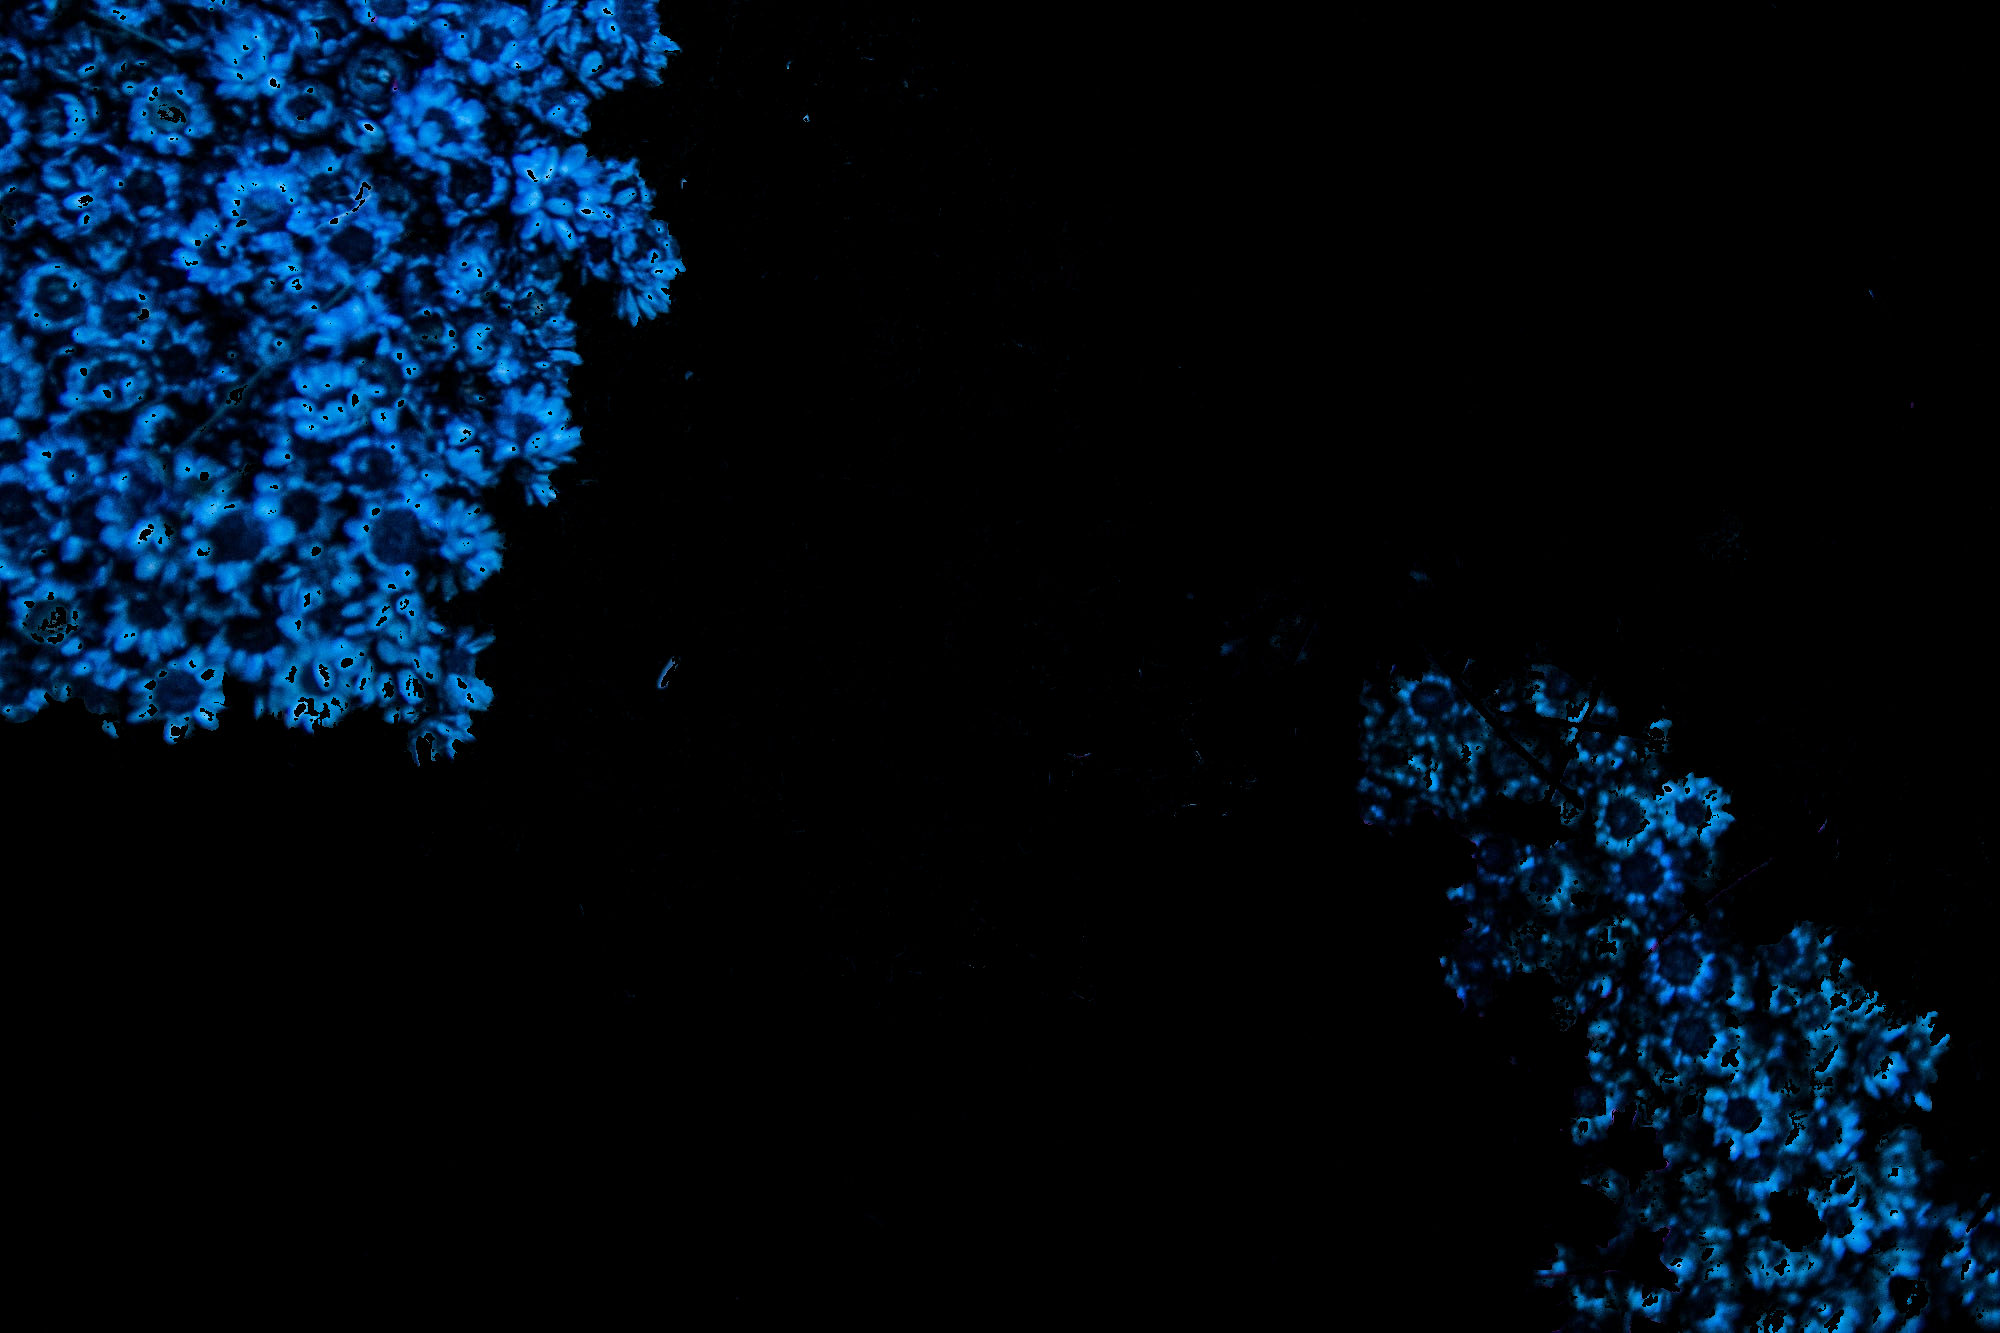

CSV Data:
       X     Y  Width  Height      Area
0   1479   696     82      79    1174.0
1   1588   689     31      38     603.5
2   1493   662     99      58    2883.5
3   1351   652    649     681  191060.0
4   1890  1277     42      50    1205.5
5   1765  1164     63      89    2910.5
6   1632  1079     44      47     774.0
7   1677  1076     47      43     645.0
8   1611   941     42      55     782.0
9   1219   635     31      44     503.0
10     0     0    688     767  414447.0


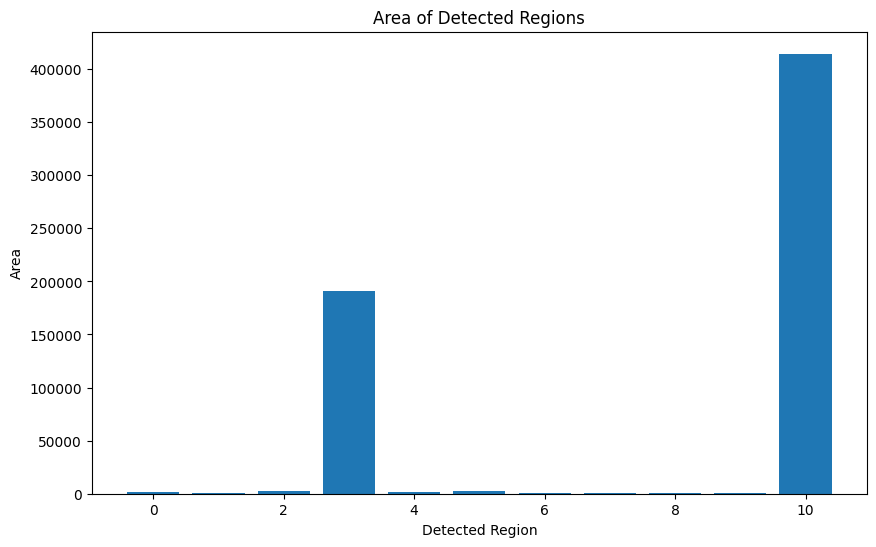

In [3]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def detect_colour(image_path, lower_hsv, upper_hsv, csv_output_path):
    """
    Detects specified colour in an image and saves the results to a CSV.

    Parameters:
        image_path (str): Path to the input image.
        lower_hsv (tuple): Lower bound of HSV values.
        upper_hsv (tuple): Upper bound of HSV values.
        csv_output_path (str): Path to save the output CSV file.
    """
    # Load image
    image = cv2.imread("/content/0_9H74uSINU-qGHWz5.jpg")
    if image is None:
        print("Error: Image not found or invalid image format.")
        return

    # Convert to HSV colour space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Create mask for the specified colour range
    mask = cv2.inRange(hsv_image, lower_hsv, upper_hsv)

    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Prepare data for CSV
    csv_data = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 500:  # Adjust area threshold as needed
            x, y, w, h = cv2.boundingRect(contour)
            csv_data.append([x, y, w, h, area])

    # Save data to CSV
    df = pd.DataFrame(csv_data, columns=["X", "Y", "Width", "Height", "Area"])
    df.to_csv(csv_output_path, index=False)
    print(f"CSV saved at {csv_output_path}")

    # Apply mask to original image
    result = cv2.bitwise_and(image, image, mask=mask)

    # Display results
    cv2_imshow(image)
    cv2_imshow(mask)
    cv2_imshow(result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def process_csv(csv_input_path):
    """
    Processes the CSV generated by the colour detection.

    Parameters:
        csv_input_path (str): Path to the CSV file to be processed.
    """
    df = pd.read_csv(csv_input_path)
    print("CSV Data:")
    print(df)

    # Example: Plot areas of detected regions
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(df)), df['Area'])
    plt.xlabel('Detected Region')
    plt.ylabel('Area')
    plt.title('Area of Detected Regions')
    plt.show()

if __name__ == "__main__":
    # Example usage for detecting blue colour
    image_path = 'path_to_your_image.jpg'  # Replace with your image path
    csv_output_path = '/content/colour_detection_output.csv'

    # Define HSV range for blue colour
    lower_blue = np.array([100, 150, 0])
    upper_blue = np.array([140, 255, 255])

    # Detect colour and generate CSV
    detect_colour(image_path, lower_blue, upper_blue, csv_output_path)

    # Process the CSV generated
    process_csv(csv_output_path)
